## ==========  MULTI CLASSIFICATION: CLEVR DATA SET  ==============

### Reading Input Dataset: Image Pixels & Class Labels

In [1]:
import csv
import os

In [2]:
import numpy as np 
import copy
import sys
import pdb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

def get_data(x_path, y_path, doNormalize):
    ''' Returns: x: np array of [NUM_OF_SAMPLES x n]  y: np array of [NUM_OF_SAMPLES]
    '''
    x = np.load(x_path)
    y = np.load(y_path)
    

    y = y.astype('int')
    x = x.astype('float')

    #normalize x:
    if doNormalize:
        x = 2*(0.5 - x/255)
    return x, y

x_train, y_train = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/x_train.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/y_train.npy", 1)
x_test,   y_test = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/x_test.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/y_test.txt", 1)
print ("training data det:          ", x_train)
print ("\ntraining class labels:    ", y_train)
print ("\ntesting data det:         ", x_test)
print ("\ntesting class labels:     ", y_test)
print ("\nsize of single sample:      ", len(x_train[0]))
print ("number of training samples: ", len(x_train))
print ("number of testing  samples: ", x_test.shape)
x_test = x_test[0:1000]
print ("number of testing  samples: ", x_test.shape)

training data det:           [[ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.21568627  0.21568627  0.22352941 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.21568627  0.21568627  0.22352941 ... -0.2        -0.15294118
  -1.        ]
 ...
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.        ]
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.        ]
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]]

training class labels:     [1 3 4 ... 4 3 2]

testing data det:          [[ 0.20784314  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.21568627  0.21568627  0.22352941 ... -0.19215686 -0.15294118
  -1.        ]
 [ 0.20784314  0.21568627  0.21568627 ... -0.19215686 -0.15294118
  -1.        ]
 ...
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.        ]
 [ 0.21568627  0.21568627  0.21568627 ... -0.19215686 -0.14509804
  -1.     

### Example Image 

number of boxes in the image:  3


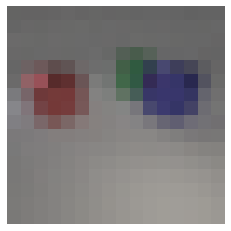

In [3]:
x_train_rgb, y_train = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/x_train.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/y_train.npy", 0)
x_test_rgb,  y_test = get_data("/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/x_test.npy", "/Users/dishantgoyal/Desktop/ml/0_neural_network_classification/dataset_multiClass_clevr/y_test.txt", 0)

from matplotlib import pyplot as plt
index = 4
img = np.reshape(np.uint64(x_train_rgb[index]), (16, 16, 4))
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show
print ("number of boxes in the image: ", y_train[index])

### Distribution of Class Labels

In [4]:
unique_labels  = np.unique(y_train)
label_count    = np.bincount(np.int64(y_train))

print ("[train] unique labels:      ", unique_labels)
print ("[train] count distribution: ", label_count)

unique_labels  = np.unique(y_test)
label_count    = np.bincount(np.int64(y_test))

print ("[test]  unique labels:      ", unique_labels)
print ("[test]  count distribution: ", label_count)

[train] unique labels:       [1 2 3 4 5]
[train] count distribution:  [   0 1971 1978 1952 2008 2091]
[test]  unique labels:       [1 2 3 4 5]
[test]  count distribution:  [  0 214 183 219 191 193]


### Neural Network Design Parameters

In [5]:
learning_rate         = 0.01
max_iter              = 15000                        # number of iterations of sgd
enable_adaptive_learn = 1
batch_size            = 32
initial_num_features  = len(x_train[0])
#hidden_layer_list     = [512, 256, 128, 64]     # for sigmoid; 50% single layer to 70% many layers
hidden_layer_list     =  [30]                    # for reLu; even a single layer gives 70% accuracy; adding more layers did not improve the accuracy
#hidden_layer_list     = [50, 40, 30, 20]
#hidden_layer_list     = [2, 2, 2, 2]
num_classes           = 5
hidden_layer_list.append(num_classes)
num_layers            = len(hidden_layer_list)
train_size            = len(x_train)
test_size             = len(x_test)
isLeastSquare         = 0                           # (1 - correspoding_output_probability)^2   if 0 then it is log likelyhood
isReLu                = 1                           # max(0,z);  if 0 then it is sigmoid (only for hidden layers)

if isReLu:                                          # setting up the initial starting point
    left_range  = 0                                 
    right_range = 1
else:
    left_range  = -1
    right_range = 1

print ("batch size:        ", batch_size)
print ("max_iter_sgd:      ", max_iter)
print ("num features:      ", initial_num_features)
print ("hiden layers size: ", hidden_layer_list)
print ("number of layers:  ", num_layers)
print ("number of classes: ", num_classes)
print ("size of training:  ", train_size)
print ("size of test:      ", test_size)
print ("isLeastSquare:     ", isLeastSquare)

batch size:         32
max_iter_sgd:       15000
num features:       1024
hiden layers size:  [30, 5]
number of layers:   2
number of classes:  5
size of training:   10000
size of test:       1000
isLeastSquare:      0


### Initialize Perceptron Parameters

In [6]:
row_length            = initial_num_features
list_parameter_matrix = []                                      # at index i, stores the parameter matrix for corresponding hidden layer

for layer in range(0, len(hidden_layer_list)):        # traversing the hidden layer from left to right
    num_rows    = hidden_layer_list[layer]
    para_matrix = np.zeros((num_rows, row_length))    # all parameters initialized to 0.5 initially
    para_matrix = np.random.uniform(left_range,right_range,(num_rows, row_length))     # for sigmoid, better bw -1 & 1; for relu anything but better with 0 & 1 
    #para_matrix.fill(0.2) 
    list_parameter_matrix.append(para_matrix)
    row_length  = num_rows                            # for the next hidden layer

print ("number of parameter matricies: ", len(list_parameter_matrix))

number of parameter matricies:  2


### Computing Output Probabilities Every Perceptron

In [7]:
import math
e = math.e

def softmax_best_pr (output_values, pr, class_label, example_index, isTrain):            # for the final probability
    class_label[0] = output_values.argmax() + 1
    scaled_values  = output_values - max(output_values)          # to avoid overflow
    train_inp      = pow(e, scaled_values)                       # input to the last single softmax-perceptron
    sum_values     = train_inp.sum()
    if isTrain:
        pr[0]          = train_inp[int(y_train[example_index])-1]/sum_values

In [8]:
def compute_error(train_acc, error, distribution): 
    train_acc[0]    = 0
    error[0]        = 0

    for index in range(start_range[0], end_range[0]):
        output       = [None]*num_layers
        train_inp    = x_train[index]           # row of attributes
        for layer in range(0, num_layers):
            output[layer]  = np.matmul(list_parameter_matrix[layer],  train_inp.transpose())
            for pindex in range(0, np.shape(output[layer])[0]):
                
                if isReLu:                                             # reLu activation function
                    output[layer][pindex]  = max(0, output[layer][pindex])
                else:                                                  # sigmoid activation function
                    if (output[layer][pindex] > 20):                   # to avoid numerical warnings/errors
                        output[layer][pindex]  = 1
                    elif (output[layer][pindex] < -20):
                        output[layer][pindex]  = 0
                    else:
                        output[layer][pindex]  = 1/(1+pow(e, -1*output[layer][pindex]))                                       # using sigmoid g(z)
            train_inp      = copy.deepcopy(output[layer])                                         # fetch as input to next layer
        
        final_pr         = [0]
        predicted_label  = [0]
        softmax_best_pr (output[num_layers-1], final_pr, predicted_label, index, 1)    # isTrain = 1
        if predicted_label[0] == y_train[index]:
            train_acc[0] += 1
            distribution[y_train[index] -1] += 1
        
        if isLeastSquare:                                      # least squares  =========
            error[0] += (1-final_pr[0])*(1-final_pr[0])
        else:                                                  # log likelyhood =========
            if final_pr[0] != 0:                            
                error[0] += -1*math.log(final_pr[0])               
            else:
                error[0] += 999999
        output_list.append(output)

In [9]:
def compute_full_accuracy (full_acc, distribution, y_pred, isTrain):     # computes the full accuracy of the training and test datas sets
    full_acc[0]    = 0
    
    if (isTrain):
        num_samples = len(x_train)
    else:
        num_samples = len(x_test)
        
    for index in range(0, num_samples):
        output       = [None]*num_layers
        
        if isTrain:
            train_inp    = x_train[index]           # row of attributes
        else:
            train_inp    = x_test[index]            # row of attributes
            
        for layer in range(0, num_layers):
            output[layer]  = np.matmul(list_parameter_matrix[layer],  train_inp.transpose())
            for pindex in range(0, np.shape(output[layer])[0]):
                if isReLu:                                             # reLu activation function
                    output[layer][pindex]  = max(0, output[layer][pindex])
                else:                                                  # sigmoid activation function
                    if (output[layer][pindex] > 20):                   # to avoid numerical warnings/errors
                        output[layer][pindex]  = 1
                    elif (output[layer][pindex] < -20):
                        output[layer][pindex]  = 0
                    else:
                        output[layer][pindex]  = 1/(1+pow(e, -1*output[layer][pindex]))        # using sigmoid g(z)
            train_inp      = copy.deepcopy(output[layer])                                  # fetch as input to next layer
        
        final_pr         = [0]
        predicted_label  = [0]
        softmax_best_pr (output[num_layers-1], final_pr, predicted_label, index, isTrain)
        y_pred[index] = predicted_label
        
        if isTrain:
            if predicted_label[0] == y_train[index]:
                full_acc[0] += 1
                distribution[y_train[index] -1] += 1
        else:
            if predicted_label[0] == y_test[index]:
                full_acc[0] += 1
                distribution[y_test[index] -1] += 1

### Computing Gradient: Simple Backpropagation

##### each hidden layer:   0-1   sigmoid
##### last layer:                 multi sigmoid (softmax)
##### loss function:          cross-entropy (basically log likelyhood)

In [10]:
num_para_hidLay_list  = [initial_num_features] + hidden_layer_list
print ("parameter size for each perceptron of hidden layer: ", num_para_hidLay_list)

def update_parameters():
    old_para_matrix       = copy.deepcopy(list_parameter_matrix)      ## store the old parameters in a separate varaible
    grad_para_x           = copy.deepcopy(list_parameter_matrix)      ## grad x     ### dummy values  ## will be computed further
    grad_para_t           = copy.deepcopy(list_parameter_matrix)      ## grad theta ### dummy values  ## will be computed further

    for example_index in range(start_range[0], end_range[0]):
        for layer in range(num_layers-1, -1, -1):                # traverse the layers in reverse order
            if layer+1 == num_layers:
                scaled_outputs  = output_list[example_index][layer] - max(output_list[example_index][layer])          # to avoid overflow
                train_inp      = pow(e, scaled_outputs)                       # input to the last single softmax-perceptron
                sum_values     = train_inp.sum()
                sum_para_ary   = train_inp/sum_values
                pr_selected    = sum_para_ary[int(y_train[example_index])-1]
                
                if isLeastSquare:                                         ## === derivative based on least squares  ===
                    sum_para_ary = 2*(1-pr_selected)*-1*-1*pr_selected*sum_para_ary
                    sum_para_ary[int(y_train[example_index])-1] = 2*(1-pr_selected)*-1*pr_selected*(1-pr_selected)
                    
                else:                                                     ## === derivative based on log likelyhood ===
                    sum_para_ary[int(y_train[example_index])-1] -= 1
            else:
                sum_para_ary = grad_para_x[layer+1].sum(axis=0)
            
            if isReLu:                                             # derivative of reLu activation function
                #grad_gz        = (output_list[example_index][layer] >= 0).astype(int)       # not enough due to vanashing gradients
                grad_gz         = np.where(output_list[example_index][layer] > 0, 1, np.random.rand(1))   # assigning small gradient to negative values
                
            else:                                                  # derivative of sigmoid activation function
                grad_gz        = 1 - output_list[example_index][layer]
                grad_gz        = np.multiply(grad_gz, output_list[example_index][layer])
                
            perceptron_ary = np.multiply(grad_gz, sum_para_ary)
            if layer == 0:                                               # [None,:] makes shape (,5)  --->  (1,5)
                grad_para_t[layer]        =  np.matmul(perceptron_ary[None,:].transpose(), x_train[example_index][None,:])
            else:
                grad_para_t[layer]        =  np.matmul(perceptron_ary[None,:].transpose(), output_list[example_index][layer-1][None,:]) 
            list_parameter_matrix[layer] -=  grad_para_t[layer]*learning_rate
            
            grad_para_x[layer]            =  old_para_matrix[layer]*perceptron_ary[None,:].transpose()

parameter size for each perceptron of hidden layer:  [1024, 30, 5]


### Gradient Descent

In [11]:
flag = 0
direction      = 1
num_iter       = 0
error          = [1]
start_range    = [0]
end_range      = [0]
train_acc      = [0]
full_acc       = [0]
max_acc        = 0
distribution   = {0:0,1:0,2:0,3:0,4:0}
num_epochs     = 1
seed_learning_rate = learning_rate
best_parameter_matrix = copy.deepcopy(list_parameter_matrix)

while (error[0] > 0.00001) and num_iter < max_iter:
    if start_range[0] == 0:
        output_list  = []                  # output[index] stores the list of outputs for training example_index <index> 
    end_range[0] = start_range[0] + batch_size 
    
    distribution = {0:0,1:0,2:0,3:0,4:0}
    compute_error(train_acc, error, distribution)        # compute the log likelyhood error/cost fn of sum of all examples/data-points
    
    if num_iter%1000 == 0:
        print ("\nnum sgd iter  : ", num_iter)
        print ("train accuracy: ", train_acc[0])
        print ("dist          : ", distribution)
        print ("error value   : ", error[0])
        print ("range:          ", start_range[0], end_range[0])

    update_parameters()                # update the parameters of each perceptron using gradient descent
    num_iter +=1;

    start_range[0] = start_range[0] + batch_size
    if (start_range[0] >= 10000-33):
        start_range[0] = 0
        num_epochs += 1
        if enable_adaptive_learn:
            learning_rate = seed_learning_rate/math.sqrt(num_epochs)    # it is called inverse scaling
            print ("============== new learning rate: ", learning_rate)
        
        ###### used for debugging as well ; to see regular change in accuracy; change learning rate accordingly ###### 
        distribution = {0:0,1:0,2:0,3:0,4:0}
        y_pred       = [None] * len(x_train)
        compute_full_accuracy(full_acc, distribution, y_pred, 1)   # isTrain = 1
        print ("full accuracy : ", full_acc[0])
        print ("dist          : ", distribution)
        if (max_acc < full_acc[0]):
            max_acc = full_acc[0]
            best_parameter_matrix = copy.deepcopy(list_parameter_matrix)
        print ("max train accuracy : ", max_acc)
        
list_parameter_matrix = copy.deepcopy(best_parameter_matrix)    # choose the parameters that gave the best train accuarcy during training


num sgd iter  :  0
train accuracy:  1
dist          :  {0: 1, 1: 0, 2: 0, 3: 0, 4: 0}
error value   :  51.50201319789124
range:           0 32
============== new learning rate:  0.0070710678118654745
full accuracy :  2291
dist          :  {0: 1971, 1: 0, 2: 0, 3: 0, 4: 320}
max train accuracy :  2291
============== new learning rate:  0.005773502691896258
full accuracy :  2257
dist          :  {0: 1971, 1: 0, 2: 0, 3: 0, 4: 286}
max train accuracy :  2291
============== new learning rate:  0.005
full accuracy :  2154
dist          :  {0: 1971, 1: 0, 2: 0, 3: 0, 4: 183}
max train accuracy :  2291

num sgd iter  :  1000
train accuracy:  12
dist          :  {0: 12, 1: 0, 2: 0, 3: 0, 4: 0}
error value   :  52.14029993269414
range:           2048 2080
============== new learning rate:  0.004472135954999579
full accuracy :  2309
dist          :  {0: 1971, 1: 0, 2: 0, 3: 0, 4: 338}
max train accuracy :  2309
============== new learning rate:  0.004082482904638631
full accuracy :  2321
dist  

### Train & Test Accuracies & PR Report

In [12]:
from sklearn.metrics import classification_report
distribution = {0:0,1:0,2:0,3:0,4:0}
y_pred       = [None] * len(x_train)
compute_full_accuracy(full_acc, distribution, y_pred, 1)
print ("full train accuracy: ", full_acc[0])
print ("full train accuracy: ", full_acc[0]/len(x_train))
print ("dist               : ", distribution)
print("PR Report          : \n", classification_report(y_train, y_pred, labels=[1, 2, 3, 4, 5], zero_division=0))

full train accuracy:  6388
full train accuracy:  0.6388
dist               :  {0: 1900, 1: 1260, 2: 797, 3: 520, 4: 1911}
PR Report          : 
               precision    recall  f1-score   support

           1       0.78      0.96      0.86      1971
           2       0.64      0.64      0.64      1978
           3       0.59      0.41      0.48      1952
           4       0.49      0.26      0.34      2008
           5       0.60      0.91      0.72      2091

    accuracy                           0.64     10000
   macro avg       0.62      0.64      0.61     10000
weighted avg       0.62      0.64      0.61     10000



In [13]:
distribution = {0:0,1:0,2:0,3:0,4:0}
y_pred       = [None] * len(y_test)
compute_full_accuracy(full_acc, distribution, y_pred, 0)
print ("full test accuracy: ", full_acc[0])
print ("full test accuracy: ", full_acc[0]/len(x_test))
print ("dist              : ", distribution)
print("PR Report         : \n", classification_report(y_test, y_pred, labels=[1, 2, 3, 4, 5], zero_division=0))

full test accuracy:  623
full test accuracy:  0.623
dist              :  {0: 205, 1: 115, 2: 76, 3: 56, 4: 171}
PR Report         : 
               precision    recall  f1-score   support

           1       0.80      0.96      0.87       214
           2       0.56      0.63      0.59       183
           3       0.65      0.35      0.45       219
           4       0.48      0.29      0.36       191
           5       0.56      0.89      0.69       193

    accuracy                           0.62      1000
   macro avg       0.61      0.62      0.59      1000
weighted avg       0.62      0.62      0.60      1000



##### JUNK: Explanation of Matrix Multiplications

In [14]:
#             for perceptron in range(0, hidden_layer_list[layer]):
#                     y_out                 = output_list[example_index][layer][perceptron]
#                     if layer == 0:
#                         local_grad_t      = y_out*(1-y_out)*x_train[example_index]
#                     else:
#                         local_grad_t      = y_out*(1-y_out)*output_list[example_index][layer-1]
                        
#                     grad_para_t[layer][perceptron]             =  local_grad_t*sum_para_ary[perceptron]
#                     list_parameter_matrix[layer][perceptron]  -=  grad_para_t[layer][perceptron]*learning_rate
                    
#                     local_grad_x                               =  y_out*(1-y_out)*old_para_matrix[layer][perceptron]
#                     grad_para_x[layer][perceptron]             =  local_grad_x*sum_para_ary[perceptron]
                    
#                    sum_para_ary           = grad_para_x[layer+1][:,para_index_forward_layer].sum()  # column vector read as a row vector
                
#                 for para_index in range(0, num_para_hidLay_list[layer]):
#                     y_out                                     = output_list[example_index][layer][perceptron]
#                     if layer == 0:
#                         x_in                                  = x_train[example_index][para_index]
#                     else:
#                         x_in                                  = output_list[example_index][layer-1][para_index]
#                     local_grad_t                              = y_out*(1-y_out)*x_in
#                     grad_para_t[layer][perceptron][para_index]             = sum_para_ary*local_grad_t   # multiply each element with local grad
#                     list_parameter_matrix[layer][perceptron][para_index]  -= grad_para_t[layer][perceptron][para_index]*learning_rate
                    
#                     local_grad_x                                           = y_out*(1-y_out)*old_para_matrix[layer][perceptron][para_index]
#                     grad_para_x[layer][perceptron][para_index]             = sum_para_ary*local_grad_x
